Overview
At Zeus, we work in a two-sided market where we rent properties from landlords, furnish them, and then offer them to residents for medium-term stays (30+ days).
<p>The leases we sign with landlords are typically for a year or longer. As such, pricing decisions on what to offer landlords to rent their properties is extremely important to the business. If we offer too low of a price, landlords won’t lease their properties to us. If we offer landlords too high of a price, we can be stuck in a bad lease where we may lose money because tenants are unwilling to rent the place at a profitable furnished price.
<p>Problem
In this problem, we’ve acquired some data about current rent prices in Washington, D.C. We would like to use this data to create a model that can predict what the rent price should be for new properties that come onto the market.
<p>Q1: How are you modeling the problem?
<br>Q2: Why did you choose this type of approach?
<br>Q3: Which features are the most important predictor for rent prices?
<br>Q4: Is your model biased? If so, how and what would you need to fix it?
<br>Q5: How should this model be used when creating a lease offer to a landlord?
<br>Q6: What other sources or data points would you need in order to improve the model’s predictive functionality?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('washingtondc_data.csv')

In [4]:
df.shape

(10939, 12)

In [5]:
df.head()

,id,sqft,bedrooms,bathrooms,zip,city,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,1432244,649.0,1.0,1.0,20004,Washington,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,2311027,436.0,1.0,1.0,20036,Washington,Dupont Circle,condominium,NaN,NaN,0.000000,662.0
2,1260774,696.0,1.0,1.0,20001,Washington,Chinatown,apartment,In Unit,NaN,0.000000,727.0
3,2895465,550.0,1.0,1.0,20002,Washington,Ivy City,apartment,NaN,NaN,0.000000,800.0
4,2245415,620.0,1.0,1.0,20019,Washington,Marshall Heights,apartment,NaN,Off Street,0.719846,800.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10939 non-null  int64  
 1   sqft                10939 non-null  float64
 2   bedrooms            10939 non-null  float64
 3   bathrooms           10939 non-null  float64
 4   zip                 10939 non-null  int64  
 5   city                10939 non-null  object 
 6   neighbourhood       10939 non-null  object 
 7   norm_property_type  10939 non-null  object 
 8   norm_laundry        10342 non-null  object 
 9   norm_parking        9425 non-null   object 
 10  quality             10939 non-null  float64
 11  rent                10939 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.0+ MB


Checking if i can convert sqft to int32

In [7]:
sqft_int = df['sqft'].astype('int')

In [8]:
diff = sqft_int - df['sqft']

In [9]:
diff.value_counts()

0.0    10939
Name: sqft, dtype: int64

In [10]:
df['sqft'] = df['sqft'].astype('int32')

Bedrooms and bathrooms are also expected to be integers

In [11]:
df['bedrooms'] = df['bedrooms'].astype('int32')
df['bathrooms'] = df['bathrooms'].astype('int32')

In [12]:
df['city'].nunique()

1

Since city is Washington for all data, we will drop this column

In [13]:
df.drop('city', axis = 1, inplace = True)

In [14]:
df

,id,sqft,bedrooms,bathrooms,zip,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,1432244,649,1,1,20004,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,2311027,436,1,1,20036,Dupont Circle,condominium,NaN,NaN,0.000000,662.0
2,1260774,696,1,1,20001,Chinatown,apartment,In Unit,NaN,0.000000,727.0
3,2895465,550,1,1,20002,Ivy City,apartment,NaN,NaN,0.000000,800.0
4,2245415,620,1,1,20019,Marshall Heights,apartment,NaN,Off Street,0.719846,800.0
...,...,...,...,...,...,...,...,...,...,...,...
10934,1901282,2715,2,3,20001,Chinatown,apartment,In Unit,Garage,0.470642,5999.0
10935,1104870,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.465949,5999.0
10936,1940637,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.461255,5999.0
10937,1237651,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.437787,5999.0


In [15]:
df['neighbourhood'].nunique()

124

In [16]:
df['neighbourhood'].value_counts()

Chinatown                   908
Adams Morgan                815
Columbia Heights            751
Cleveland Park              580
Dupont Circle               533
                           ... 
Capitol Riverfront            1
American University Park      1
River Terrace                 1
Fort Davis Park               1
Fairfax Village               1
Name: neighbourhood, Length: 124, dtype: int64

In [17]:
df['norm_property_type'].nunique()

5

In [18]:
df['norm_property_type'].value_counts()

apartment      9524
condominium     746
townhouse       316
house           303
other            50
Name: norm_property_type, dtype: int64

We will convert neighbourhood and norm_property_type into dummy variables to be able to quantify them

In [19]:
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['norm_property_type'] = df['norm_property_type'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  10939 non-null  int64   
 1   sqft                10939 non-null  int32   
 2   bedrooms            10939 non-null  int32   
 3   bathrooms           10939 non-null  int32   
 4   zip                 10939 non-null  int64   
 5   neighbourhood       10939 non-null  category
 6   norm_property_type  10939 non-null  category
 7   norm_laundry        10342 non-null  object  
 8   norm_parking        9425 non-null   object  
 9   quality             10939 non-null  float64 
 10  rent                10939 non-null  float64 
dtypes: category(2), float64(2), int32(3), int64(2), object(2)
memory usage: 668.6+ KB


In [21]:
df

,id,sqft,bedrooms,bathrooms,zip,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,1432244,649,1,1,20004,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,2311027,436,1,1,20036,Dupont Circle,condominium,NaN,NaN,0.000000,662.0
2,1260774,696,1,1,20001,Chinatown,apartment,In Unit,NaN,0.000000,727.0
3,2895465,550,1,1,20002,Ivy City,apartment,NaN,NaN,0.000000,800.0
4,2245415,620,1,1,20019,Marshall Heights,apartment,NaN,Off Street,0.719846,800.0
...,...,...,...,...,...,...,...,...,...,...,...
10934,1901282,2715,2,3,20001,Chinatown,apartment,In Unit,Garage,0.470642,5999.0
10935,1104870,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.465949,5999.0
10936,1940637,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.461255,5999.0
10937,1237651,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.437787,5999.0


In [22]:
property_types = ['apartment', 'condominium', 'townhouse', 'house','other']

In [23]:
for property_type in property_types:
    print(property_type)
    print(df.groupby('norm_property_type').get_group(property_type)['norm_laundry'].value_counts())
    print('\n')

apartment
In Unit        6326
In Building    2094
On Site         465
None             70
Name: norm_laundry, dtype: int64


condominium
In Unit        511
In Building    203
On Site         17
None             5
Name: norm_laundry, dtype: int64


townhouse
In Unit        283
On Site         16
In Building      9
None             3
Name: norm_laundry, dtype: int64


house
In Unit        255
On Site         22
In Building     14
None             1
Name: norm_laundry, dtype: int64


other
In Unit        33
On Site        12
In Building     2
None            1
Name: norm_laundry, dtype: int64




In [24]:
for property_type in property_types:
    print(property_type)
    print(df.groupby('norm_property_type').get_group(property_type)['norm_parking'].value_counts())
    print('\n')

apartment
Garage        4811
Street        2025
Off Street    1031
None           234
Carport         61
Other            2
Name: norm_parking, dtype: int64


condominium
Street        280
Garage        156
Off Street    144
None           47
Carport        12
Name: norm_parking, dtype: int64


townhouse
Street        132
Off Street    116
Garage         35
Carport        14
None            5
Name: norm_parking, dtype: int64


house
Off Street    120
Street         97
Garage         44
Carport        14
None            2
Name: norm_parking, dtype: int64


other
Street        25
Off Street    11
Garage         4
None           3
Name: norm_parking, dtype: int64




I decided to use mode to fill the null values for norm_laundry and norm_parking using the mode according to the norm_property_type. I made this assumption as usually similar types of housing would have the same facilities. For each housing type, we can see that there is a dominant category and no 2 category have similar counts, so using mode would be an acceptable choice.

In [25]:
laundry_modes = {}
for property_type in property_types:
    laundry_mode = df.groupby('norm_property_type').get_group(property_type)['norm_laundry'].mode()
    laundry_modes[property_type] = laundry_mode
    property_laundry = (df['norm_property_type'] == property_type) & (df['norm_laundry'].isnull())
    df.loc[property_laundry, 'norm_laundry'] = df.loc[property_laundry, 'norm_laundry'].fillna(laundry_mode.item())

In [26]:
property_modes = {}
for property_type in property_types:
    parking_mode = df.groupby('norm_property_type').get_group(property_type)['norm_parking'].mode()
    property_modes[property_type] = parking_mode
    property_parking = (df['norm_property_type'] == property_type) & (df['norm_parking'].isnull())
    df.loc[property_parking, 'norm_parking'] = df.loc[property_parking, 'norm_parking'].fillna(parking_mode.item())

In [27]:
df

,id,sqft,bedrooms,bathrooms,zip,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,1432244,649,1,1,20004,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,2311027,436,1,1,20036,Dupont Circle,condominium,In Unit,Street,0.000000,662.0
2,1260774,696,1,1,20001,Chinatown,apartment,In Unit,Garage,0.000000,727.0
3,2895465,550,1,1,20002,Ivy City,apartment,In Unit,Garage,0.000000,800.0
4,2245415,620,1,1,20019,Marshall Heights,apartment,In Unit,Off Street,0.719846,800.0
...,...,...,...,...,...,...,...,...,...,...,...
10934,1901282,2715,2,3,20001,Chinatown,apartment,In Unit,Garage,0.470642,5999.0
10935,1104870,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.465949,5999.0
10936,1940637,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.461255,5999.0
10937,1237651,2715,3,2,20001,Chinatown,apartment,In Unit,Garage,0.437787,5999.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  10939 non-null  int64   
 1   sqft                10939 non-null  int32   
 2   bedrooms            10939 non-null  int32   
 3   bathrooms           10939 non-null  int32   
 4   zip                 10939 non-null  int64   
 5   neighbourhood       10939 non-null  category
 6   norm_property_type  10939 non-null  category
 7   norm_laundry        10939 non-null  object  
 8   norm_parking        10939 non-null  object  
 9   quality             10939 non-null  float64 
 10  rent                10939 non-null  float64 
dtypes: category(2), float64(2), int32(3), int64(2), object(2)
memory usage: 668.6+ KB


I will now drop the id and zip column. The id column does not provide any other infomation other than tagging each rent information. The zip column however, is a valuable source of information as I could use it to calculate the proximity to other important amenities such as hospitals, police stations, supermarkets, shopping malls, etc. However, due to the limited time that I have, trying to gather all this information would probably be impossible. Hence, I have decided to drop this valuable piece of information.

In [29]:
df.drop(['id', 'zip'], axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sqft                10939 non-null  int32   
 1   bedrooms            10939 non-null  int32   
 2   bathrooms           10939 non-null  int32   
 3   neighbourhood       10939 non-null  category
 4   norm_property_type  10939 non-null  category
 5   norm_laundry        10939 non-null  object  
 6   norm_parking        10939 non-null  object  
 7   quality             10939 non-null  float64 
 8   rent                10939 non-null  float64 
dtypes: category(2), float64(2), int32(3), object(2)
memory usage: 497.7+ KB


Now, let's look at how the variables affect house rent. We would expect as square feet increases, rent would increase. However, we could also see how there isn't a perfect linear relationship. This would imply that there are other factors that affect rent as well.

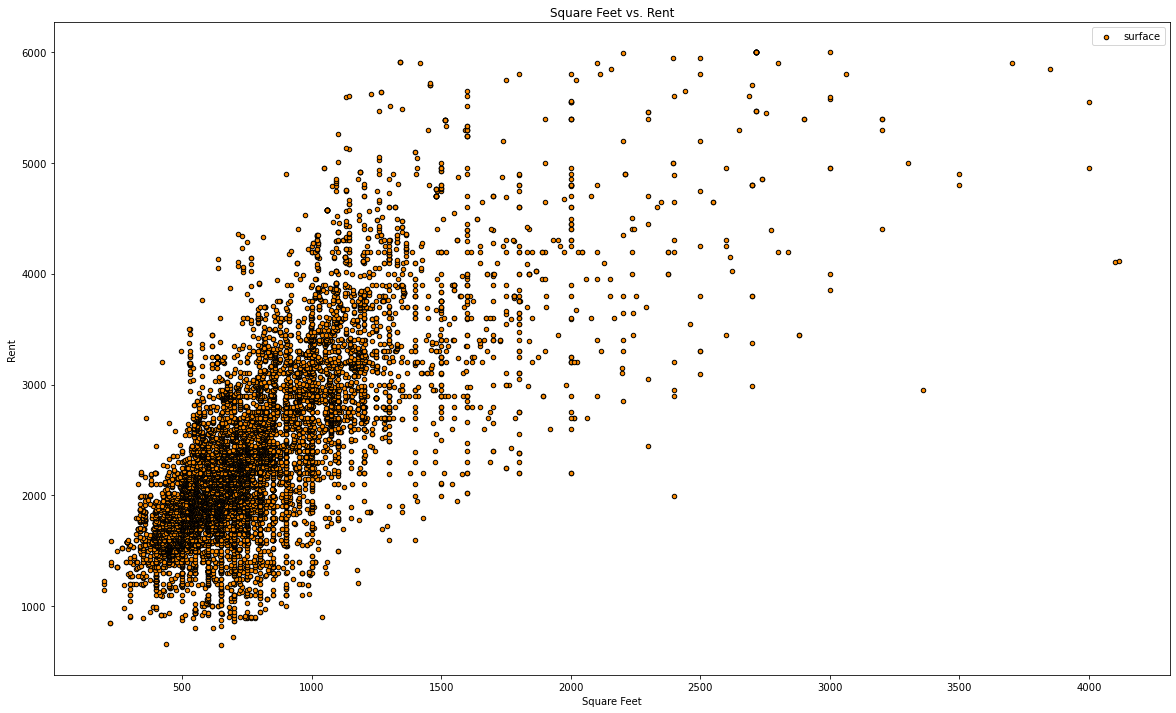

In [31]:
plt.figure(figsize = (20,12))
plt.scatter(df['sqft'],df['rent'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Square Feet")
plt.ylabel("Rent")
plt.title("Square Feet vs. Rent")
plt.legend()
plt.show()

From below graph, we can see diminishing marginal rent as square feet increase. This would mean that going for a larger house would actually be more worth it. 

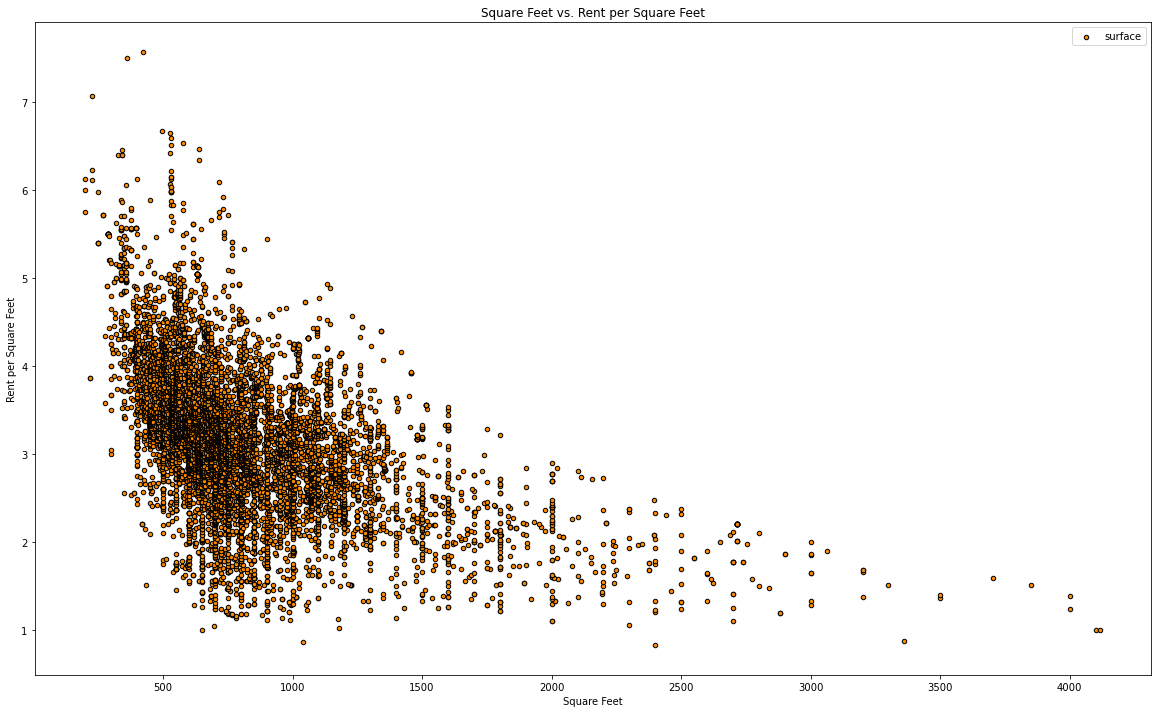

In [32]:
plt.figure(figsize = (20,12))
plt.scatter(df['sqft'],df['rent']/df['sqft'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Square Feet")
plt.ylabel("Rent per Square Feet")
plt.title("Square Feet vs. Rent per Square Feet")
plt.legend()
plt.show()

In [34]:
df.head()

,sqft,bedrooms,bathrooms,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,649,1,1,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,436,1,1,Dupont Circle,condominium,In Unit,Street,0.000000,662.0
2,696,1,1,Chinatown,apartment,In Unit,Garage,0.000000,727.0
3,550,1,1,Ivy City,apartment,In Unit,Garage,0.000000,800.0
4,620,1,1,Marshall Heights,apartment,In Unit,Off Street,0.719846,800.0


In [35]:
df.describe(include = 'all')

,sqft,bedrooms,bathrooms,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
count,10939.000000,10939.000000,10939.000000,10939,10939,10939,10939,10939.000000,10939.000000
unique,NaN,NaN,NaN,124,5,4,6,NaN,NaN
top,NaN,NaN,NaN,Chinatown,apartment,In Unit,Garage,NaN,NaN
freq,NaN,NaN,NaN,908,9524,8005,6410,NaN,NaN
mean,815.363379,1.276442,1.239327,NaN,NaN,NaN,NaN,0.752357,2408.104763
std,362.622903,0.863517,0.507706,NaN,NaN,NaN,NaN,0.348736,829.887039
min,200.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,649.000000
25%,580.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.489636,1818.000000
50%,725.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,2220.000000
75%,977.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,2869.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sqft                10939 non-null  int32   
 1   bedrooms            10939 non-null  int32   
 2   bathrooms           10939 non-null  int32   
 3   neighbourhood       10939 non-null  category
 4   norm_property_type  10939 non-null  category
 5   norm_laundry        10939 non-null  object  
 6   norm_parking        10939 non-null  object  
 7   quality             10939 non-null  float64 
 8   rent                10939 non-null  float64 
dtypes: category(2), float64(2), int32(3), object(2)
memory usage: 497.7+ KB


In [37]:
final_df = pd.get_dummies(df, columns = ['neighbourhood', 'norm_property_type', 'norm_laundry', 'norm_parking'])

In [38]:
final_df

,sqft,bedrooms,bathrooms,quality,rent,neighbourhood_16th Street Heights,neighbourhood_Adams Morgan,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Arboretum,...,norm_laundry_In Building,norm_laundry_In Unit,norm_laundry_None,norm_laundry_On Site,norm_parking_Carport,norm_parking_Garage,norm_parking_None,norm_parking_Off Street,norm_parking_Other,norm_parking_Street
0,649,1,1,1.000000,649.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,436,1,1,0.000000,662.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,696,1,1,0.000000,727.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,550,1,1,0.000000,800.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,620,1,1,0.719846,800.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,2715,2,3,0.470642,5999.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10935,2715,3,2,0.465949,5999.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10936,2715,3,2,0.461255,5999.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10937,2715,3,2,0.437787,5999.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


training data set

In [39]:
10939*0.8

8751.2

ratio of training data points to features

In [40]:
8751/140

62.50714285714286

Since we have added more features by using dummy variables, there is a need to check if we have sufficient data to accomodate these extra features. We have 62 data points for each feature, which is more than sufficient

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Columns: 144 entries, sqft to norm_parking_Street
dtypes: float64(2), int32(3), uint8(139)
memory usage: 1.7 MB


I decided to use random forest regressor for this problem as the rent does not seem to follow a linear pattern relative to square feet, so there is a need to consider more factors. Also, I am assuming that the data provided covers most types of properties in Washington, and we do not need to extrapolate our model to predict a type of housing that is not in the data.
<br>I have also use K fold cross validation to test the model to better find the average accuracy of the model

In [42]:
target= np.array(final_df['rent'])
features = final_df.drop('rent', axis = 1)
feature_list = list(features.columns)
features = np.array(features)


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=101,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 400, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 204.98
Accuracy: 90.83 %.
Mean Absolute Error: 208.17
Accuracy: 90.68 %.
Mean Absolute Error: 213.62
Accuracy: 90.37 %.
Mean Absolute Error: 199.04
Accuracy: 91.02 %.
Mean Absolute Error: 202.38
Accuracy: 91.28 %.
Mean Absolute Error: 208.72
Accuracy: 90.64 %.
Mean Absolute Error: 206.06
Accuracy: 90.88 %.
Mean Absolute Error: 204.42
Accuracy: 90.85 %.
Mean Absolute Error: 193.76
Accuracy: 91.04 %.
Mean Absolute Error: 213.97
Accuracy: 90.32 %.
Average accuracy: 90.79082468306612


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 70, cv = 3, verbose=2, random_state=101, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 27.3min finished


{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=101,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 101, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split = 5,
                               max_features = 'auto',
                               max_depth = 60,
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 207.61
Accuracy: 90.71 %.
Mean Absolute Error: 208.96
Accuracy: 90.62 %.
Mean Absolute Error: 217.6
Accuracy: 90.22 %.
Mean Absolute Error: 201.54
Accuracy: 90.94 %.
Mean Absolute Error: 205.5
Accuracy: 91.17 %.
Mean Absolute Error: 211.84
Accuracy: 90.5 %.
Mean Absolute Error: 209.47
Accuracy: 90.73 %.
Mean Absolute Error: 205.82
Accuracy: 90.78 %.
Mean Absolute Error: 197.74
Accuracy: 90.88 %.
Mean Absolute Error: 216.68
Accuracy: 90.23 %.
Average accuracy: 90.67647154158036


It seems there isn't much improvement from using randomizedsearchcv and even a slight decrease in accuracy.

I will now look at the features that determines more than 0.5% of the result.

In [46]:
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)

[0.6348039638056313, 0.019487307818533618, 0.05671170447752345, 0.028809767787196794, 0.008346330633125528, 0.008781800240164579, 0.005807924490848828, 0.005182672350283211, 0.009753603996940165, 0.014313352873527722, 0.008523283134480435, 0.006247710210553737, 0.005075402597976109, 0.010299460677670791, 0.005415600524987585, 0.028235679687481353, 0.026311769546121154]
[(array([0]),), (array([1]),), (array([2]),), (array([3]),), (array([5]),), (array([23]),), (array([28]),), (array([32]),), (array([38]),), (array([54]),), (array([55]),), (array([101]),), (array([110]),), (array([113]),), (array([123]),), (array([134]),), (array([138]),)]


In [47]:
list_of_index = [0,1,2,3,5,23,28,32,38,54,55,101,110,113,123,134,138]

In [48]:
col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)

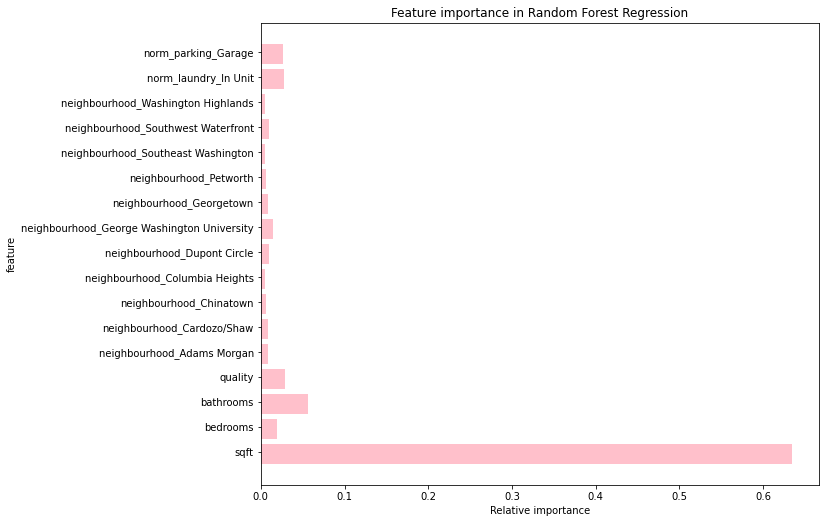

<Figure size 720x612 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

So square feet actually is the most important feature that affects rent. The 2nd most important feature would be bathrooms, but this would be correlated with square feet, since higher square feet would usually mean more bathrooms. The next few important features are parking garage, laundry in unit and quality.
<br> To lower the importance of square feet, I have decided to use rent per square feet to find the relative importance of each feature

In [50]:
final_df['rent_per_sqft'] = final_df['rent']/final_df['sqft']
final_df.drop('rent', axis = 1, inplace = True)

In [108]:
target= np.array(final_df['rent_per_sqft'])
features = final_df.drop('rent_per_sqft', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
    
kf = KFold(n_splits=10,random_state=101,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 101, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split = 5,
                               max_features = 'auto',
                               max_depth = 60,
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 0.26
Accuracy: 90.81 %.
Mean Absolute Error: 0.26
Accuracy: 90.72 %.
Mean Absolute Error: 0.27
Accuracy: 90.34 %.
Mean Absolute Error: 0.26
Accuracy: 90.85 %.
Mean Absolute Error: 0.25
Accuracy: 91.14 %.
Mean Absolute Error: 0.27
Accuracy: 90.83 %.
Mean Absolute Error: 0.26
Accuracy: 90.85 %.
Mean Absolute Error: 0.24
Accuracy: 90.99 %.
Mean Absolute Error: 0.25
Accuracy: 90.96 %.
Mean Absolute Error: 0.26
Accuracy: 90.43 %.
Average accuracy: 90.79105348482976


Looks like the accuracy went up by a bit when we use rent per square feet as our indicator.

In [109]:
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)

[0.4603398676336933, 0.026941306614055912, 0.02086698585458314, 0.05024224112556278, 0.02509020648032955, 0.018359423365355357, 0.005773360071920136, 0.006410644423457024, 0.006010101575859688, 0.005864382357023496, 0.028523301295258225, 0.03241872804753421, 0.015113123902690227, 0.005676973864047935, 0.008701647872811845, 0.006156254581201329, 0.007058321987959548, 0.007645834451083224, 0.017013343545634507, 0.008601161910659247, 0.006302823554108323, 0.048888877316871956, 0.044912627023270826, 0.006624481726748713]
[(array([0]),), (array([1]),), (array([2]),), (array([3]),), (array([5]),), (array([23]),), (array([28]),), (array([30]),), (array([32]),), (array([37]),), (array([38]),), (array([54]),), (array([55]),), (array([58]),), (array([79]),), (array([96]),), (array([101]),), (array([109]),), (array([113]),), (array([123]),), (array([129]),), (array([134]),), (array([138]),), (array([140]),)]


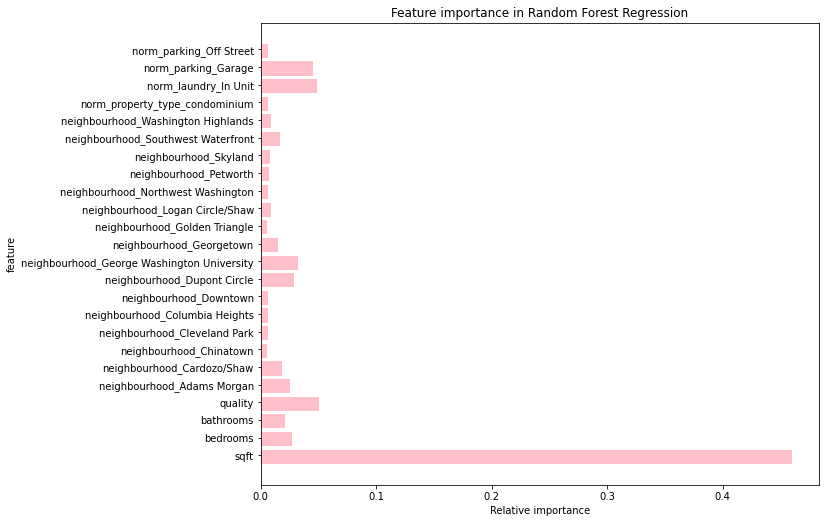

<Figure size 720x612 with 0 Axes>

In [110]:
list_of_index = [0,1,2,3,5,23,28,30,32,37,38,54,55,58,79,96,101,109,113,123,129,134,138,140]
col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

It looks like the most important features are still square feet, quality, parking Garage and laundry in unit. However, a few neighbourhoods now show up as more important like George Washington University, Dupont Circle and Adams Morgan. As I am not very familiar with Washington, I was unable to deduce if there were important amenities in these neighbourhoods or that the neighbourhood attracted certain people that could have affected rent.

In [54]:
final_df.head()

,sqft,bedrooms,bathrooms,quality,neighbourhood_16th Street Heights,neighbourhood_Adams Morgan,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Arboretum,neighbourhood_Barry Farm,...,norm_laundry_In Unit,norm_laundry_None,norm_laundry_On Site,norm_parking_Carport,norm_parking_Garage,norm_parking_None,norm_parking_Off Street,norm_parking_Other,norm_parking_Street,rent_per_sqft
0,649,1,1,1.000000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1.000000
1,436,1,1,0.000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.518349
2,696,1,1,0.000000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1.044540
3,550,1,1,0.000000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1.454545
4,620,1,1,0.719846,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1.290323


In [58]:
parking_modes = property_modes

In [59]:
print(laundry_modes)
print(parking_modes)

{'apartment': 0    In Unit
dtype: object, 'condominium': 0    In Unit
dtype: object, 'townhouse': 0    In Unit
dtype: object, 'house': 0    In Unit
dtype: object, 'other': 0    In Unit
dtype: object}
{'apartment': 0    Garage
dtype: object, 'condominium': 0    Street
dtype: object, 'townhouse': 0    Street
dtype: object, 'house': 0    Off Street
dtype: object, 'other': 0    Street
dtype: object}


In [146]:
laundry_mode = 'In Unit'
parking_mode = {'apartment': 'Garage', 'condominium': 'Street', 'townhouse': 'Street', 'other': 'Street', 'house': 'Off Street'}

In [149]:
def predict(data):
    features = ['sqft', 'bedrooms', 'bathrooms', 'quality', 'neighbourhood', 'norm_property_type', 'norm_laundry', 'norm_parking']
    test = pd.DataFrame(0, index=np.arange(1), columns=final_df.columns[:-1])
    for i in range(8):
        if i <= 3:
            test[features[i]] = data[i]
        else:
            feature = data[i]
            if feature == None and i == 6:
                feature = laundry_mode
            elif feature == None and i == 7:
                feature = parking_mode[data[5]]
            test[features[i]+'_'+feature] = 1
    return rf.predict(test)[0]*data[0]

In [139]:
df.loc[[5000]]

,sqft,bedrooms,bathrooms,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
5000,600,1,1,Dupont Circle,condominium,In Unit,Street,1.0,2150.0


In [151]:
#sqft, bedrooms, bathrooms, quality, neighbourhood, norm_property_type, norm_laundry, norm_parking
new_data = [600, 1, 1, 1.0, 'Dupont Circle', 'condominium', None, None]
predict(new_data)

2176.8797415998165

To use the model to predict, one must enter data about the square feet, number bedrooms and bathrooms, quality, neighbourhood and property type into the list labelled new_data in the cell above and run it. Laundry and parking can be inputted as None if there is no data about it. The model would use the most common data according to the property type to estimate the data for laundry and parking. 

The model is predicting what is the most likely price for renting the house. So when making the lease offer, the offer price could be slightly below the expected price by the model.
<br>Perhaps a better way is to first get the homeowner to state their rent price. And use the model to determine if the price stated is too high or too low. If it is lower than expected, then the price can be accepted immediately. If price is higher than expected, then we would need to make a counter-offer at the expected price or slightly below it.

One limitation of the model is the inability to extrapolate. So for example, if the model were to be used on data outside of Washington, its accuracy would not be the current 90% and would decrease.

The model could be improved if I had use the zip code to find the distance between the house and important amenities in the area. That would definitely play a part in the rent prices as for example having a train station nearby would likely be more desirable for renters.
<br>Another feature that could affect rent prices would be the dates. For example, homeowners could be renting their houses out during the holiday seasons when they travel overseas for vacation. Or perhaps a certain event or concert is being held and rent prices increases.